In [246]:
#Import necessary libararies

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [642]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [705]:
#Read the Dataset

Data_set1=pd.read_csv(r'C:\Users\nikhi\Downloads\Lead Scoring case study Assignment\Leads.csv')

In [706]:
Data_set1.shape

(9240, 37)

In [707]:
Data_set1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [708]:
Data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [709]:
Data_set1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [710]:
Data_set1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [711]:
Data_set1_cols=[ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

for col in Data_set1_cols:
    print(Data_set1[col].value_counts())
    print('*'*30)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
******************************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
******************************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
******************************
No     9238
Yes       2
Name: Do Not Call, dtype: int64
************************

### Data Cleaning and Null value Treatment

-- We see multiple attributes having a value 'Select', an option where the lead hasn't disclosed information abt the respective attribute. It is same as NULL.

-------------------- Hence, we consider this as a null value.

In [712]:
Data_set1=Data_set1.replace('Select', np.nan)

In [713]:
# Checking for null values

Data_set1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [714]:

for col in Data_set1.columns:
    null_value=round((Data_set1[col].isnull().sum()/len(Data_set1))*100,2)
    if(null_value>0):
        print(col+' - '+str(null_value))
    

Lead Source - 0.39
TotalVisits - 1.48
Page Views Per Visit - 1.48
Last Activity - 1.11
Country - 26.63
Specialization - 36.58
How did you hear about X Education - 78.46
What is your current occupation - 29.11
What matters most to you in choosing a course - 29.32
Tags - 36.29
Lead Quality - 51.59
Lead Profile - 74.19
City - 39.71
Asymmetrique Activity Index - 45.65
Asymmetrique Profile Index - 45.65
Asymmetrique Activity Score - 45.65
Asymmetrique Profile Score - 45.65


--- As we notice, there are few attributes which have more than 40% null values and it is best to delete these atrributes. 

In [715]:
Data_set1.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

--** Imputing Null Values **--

 1. Lead Source attribute

In [716]:
# The percentage of null values in Lead Source column is less than 1%. Hence, we impute the null values with value of mode.

Data_set1['Lead Source'].fillna(Data_set1['Lead Source'].mode()[0],inplace=True)

 2. TotalVisits attribute

In [717]:
Data_set1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [718]:
# Mean and Median values are almost same. The effect of outliers is very minimal on the data.

Data_set1.loc[Data_set1['TotalVisits'].isnull(),'TotalVisits']=Data_set1['TotalVisits'].mean()

3. Page Views Per Visit

In [719]:
Data_set1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [720]:
# Mean and Median value are almost same. The effect of outliers is very minimal on the data.

Data_set1.loc[Data_set1['Page Views Per Visit'].isnull(),'Page Views Per Visit']=Data_set1['Page Views Per Visit'].mean()

 4. Last Activity

In [721]:
Data_set1['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [722]:
# The percentage of null values in Lead Source column is close to 1%. Hence, we impute the null values with value of mode.

Data_set1['Last Activity'].fillna(Data_set1['Last Activity'].mode()[0],inplace=True)

 5. Country

In [723]:
Data_set1['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

-- Country Column consists of almost 27% of values as null. In the non-null data, the country 'India' is present in almost all the records i.e close to 96%. The second highest is USA with just 1%.
--------------   It is visible that the vast majority of customers are from India. Hence, we delete the column rather than imputing it.

In [724]:
Data_set1.drop('Country',axis=1,inplace=True)

 6. Specialization

In [725]:
Data_set1['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

-- Here, the 'select' in Specialization attribute is same as a null value. But this can't be eliminated as the beackground of lead is important for us to categorize the courses for lead.

In [726]:
Data_set1['Specialization'].fillna('Unselected',inplace=True)

In [727]:
# We see mutiple management specializations, let's bring it all under one specilization

Data_set1['Specialization']=Data_set1['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management_domain')

In [728]:
Data_set1['Specialization'].value_counts(normalize=True,dropna=False)

Management_domain                    0.460281
Unselected                           0.365801
Business Administration              0.043615
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
E-COMMERCE                           0.012121
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

 7. What is your current occupation

In [729]:
Data_set1['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [730]:
Data_set1['What is your current occupation'].fillna(Data_set1['What is your current occupation'].mode()[0],inplace=True)

 8. What matters most to you in choosing a course

In [731]:
Data_set1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [732]:
Data_set1['What matters most to you in choosing a course'].fillna(Data_set1['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [733]:
Data_set1['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

-- The attribute 'What matters most to you in choosing a course' can be deleted as it contains only one value.
-------------------------99.9 % of leads have chosen "Better Career Prospects". This becomes obvious in this parameter.

In [734]:
Data_set1.drop('What matters most to you in choosing a course',axis=1,inplace=True)

 9. Tags

In [735]:
Data_set1['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [736]:
Data_set1['Tags'].fillna('Unspecified',inplace=True)

In [737]:
Data_set1['Tags'].value_counts(dropna=False)

Unspecified                                          3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [738]:
Data_set1['Tags']=Data_set1['Tags'].replace(['Recognition issue (DEC approval)','University not recognized','Shall take in the next coming month','Lateral student','Interested in Next batch','In confusion whether part time or DLP','Want to take admission but has financial problems','Still Thinking','Lost to Others','in touch with EINS','number not provided','opp hangup','wrong number given','Diploma holder (Not Eligible)','invalid number','Not doing further education','Lost to EINS','Busy','switched off','Closed by Horizzon'],'Miscellaneous_tags')

In [739]:
Data_set1['Tags']=Data_set1['Tags'].replace('Ringing','Miscellaneous_tags')

 10. City

In [740]:
Data_set1['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [741]:
Data_set1['City'].fillna('Mumbai',inplace=True)

In [742]:
Data_set1.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

-- Replacing the data values of a column which are in very few records to reduce ambiguity.

In [743]:
Data_set1['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [744]:
Data_set1['Lead Source']=Data_set1['Lead Source'].replace('google','Google')

In [745]:
Data_set1['Lead Source']=Data_set1['Lead Source'].replace(['NC_EDM','testone','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','Press_Release','Live Chat','Social Media','Click2call','bing'],'Other_sources')

In [746]:
Data_set1['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [747]:
Data_set1['Last Activity']=Data_set1['Last Activity'].replace(['Resubscribed to emails','Visited Booth in Tradeshow','Email Marked Spam','Email Received','View in browser link Clicked','Approached upfront','Had a Phone Conversation','Unsubscribed','Unreachable'],'Other_last_Activities')

In [748]:
Data_set1['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [749]:
Data_set1['Last Notable Activity']=Data_set1['Last Notable Activity'].replace(['Email Received','Form Submitted on Website','View in browser link Clicked','Resubscribed to emails','Approached upfront','Email Marked Spam','Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced'],'Other_Activities')

####### Converting the Yes/No values of a column to 1/0.

In [750]:
Data_set1['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [751]:
Data_set1['A free copy of Mastering The Interview']=Data_set1['A free copy of Mastering The Interview'].map(lambda x: 1 if x=='Yes' else 0)

In [752]:
#-- These columns have a single data value in almost 99% of its records. Such columns do not add any value and hence can be removed.

removable_cols=['Do Not Email',
                'Do Not Call',
                'Search',
                'Magazine',
                'Newspaper Article',
                'X Education Forums',
                'Newspaper',
                'Digital Advertisement',
                'Through Recommendations',
                'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content',
                'Get updates on DM Content',
                'I agree to pay the amount through cheque']

In [753]:
Data_set1.drop(removable_cols,axis=1,inplace=True)

####### Columns 'Prospect ID' and 'Lead Number' are important to identify a lead in business perspective but it doesn't add any value to the Machine learning model. 
Hence we remove these values.

In [754]:
drop_cols=Data_set1[['Prospect ID', 'Lead Number']]

In [756]:
Data_set1.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [757]:
drop_cols

,Prospect ID,Lead Number
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,3256f628-e534-4826-9d63-4a8b88782852,660681
...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538


### Uni-variate and Bi-Variate Analysis

In [758]:
Data_set1.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [239]:
categorical_cols=['Lead Origin', 'Lead Source','Last Activity',
                  'Specialization', 'What is your current occupation', 'Tags', 'City',
                  'A free copy of Mastering The Interview', 'Last Notable Activity']

numerical_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

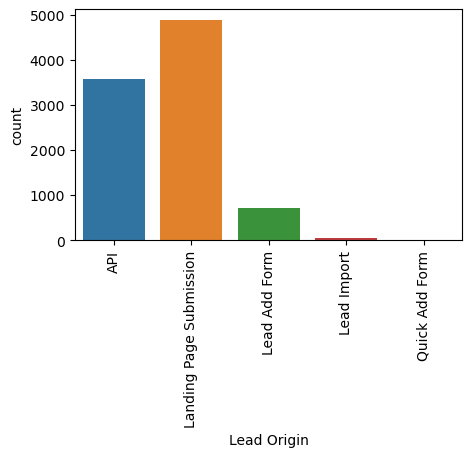

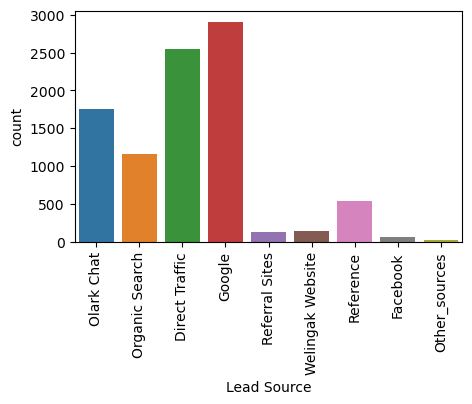

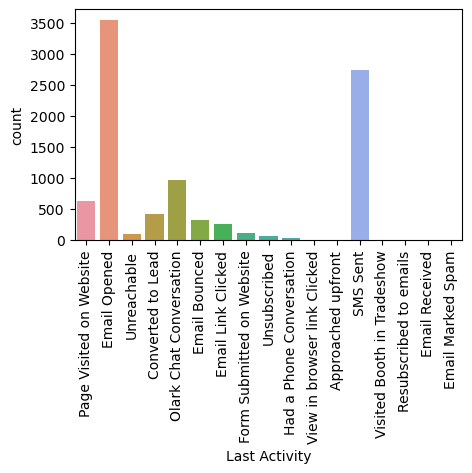

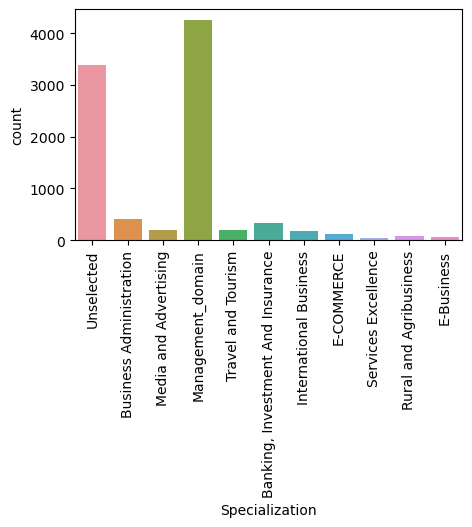

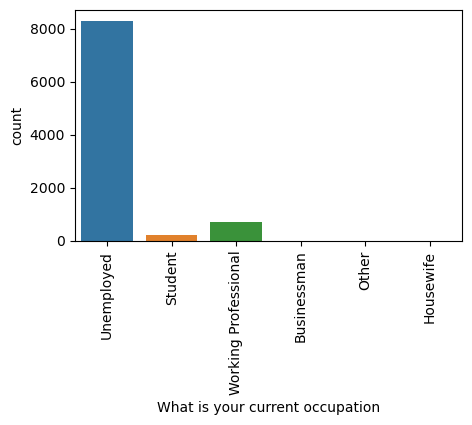

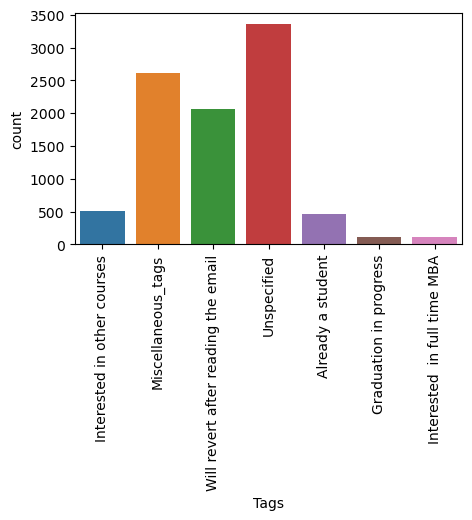

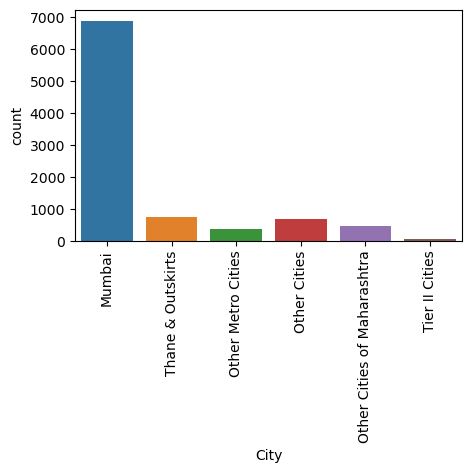

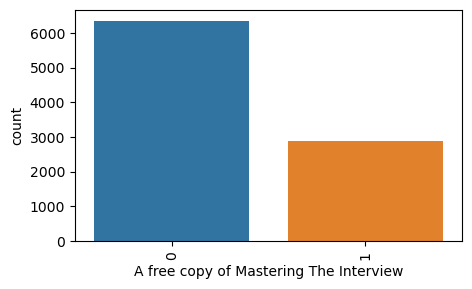

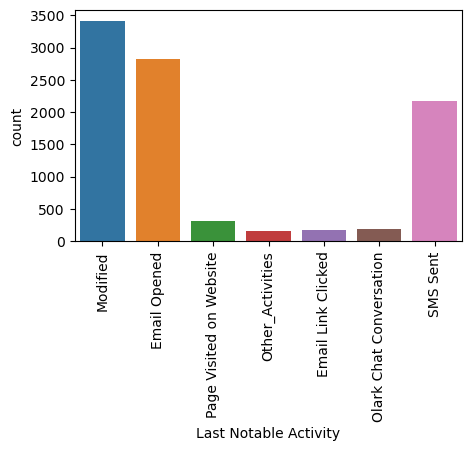

In [388]:
for cat_col in categorical_cols:
    plt.figure(figsize=[5,3])
    sns.countplot(data=Data_set1,x=cat_col)
    plt.xticks(rotation=90)
    
plt.show()

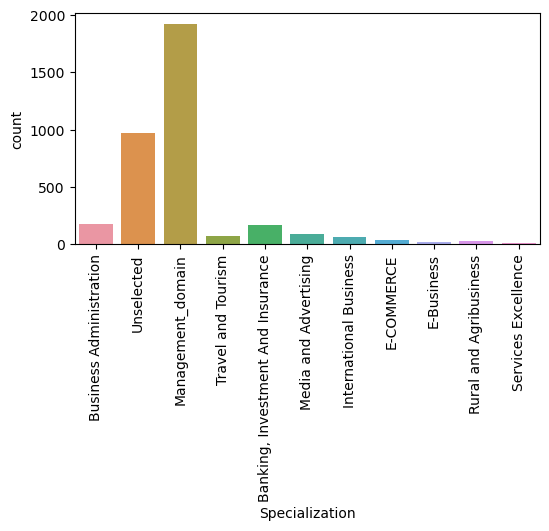

In [389]:
plt.figure(figsize=[6,3])
sns.countplot(x=Data_set1[Data_set1['Converted']==1]['Specialization'],data=Data_set1)
plt.xticks(rotation=90)
plt.show()

-- The converted leads are more from Management specialised domain

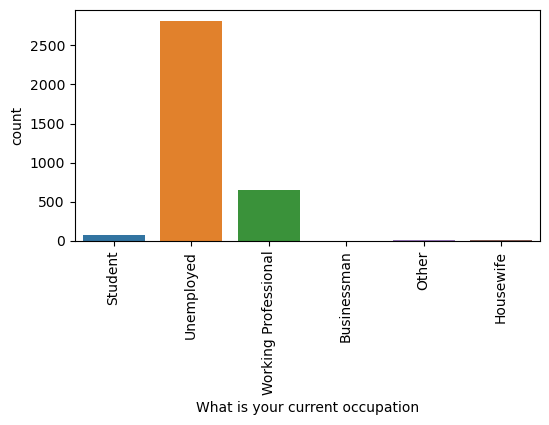

In [301]:
plt.figure(figsize=[6,3])
sns.countplot(x=Data_set1[Data_set1['Converted']==1]['What is your current occupation'],data=Data_set1)
plt.xticks(rotation=90)
plt.show()

-- Focus should be kept on Unemployed individuals.

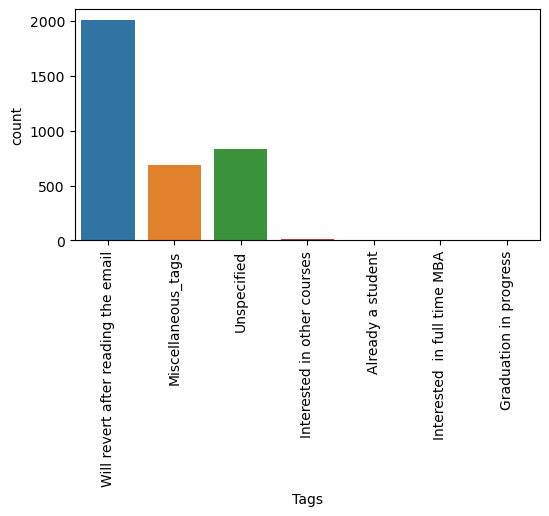

In [302]:
plt.figure(figsize=[6,3])
sns.countplot(x=Data_set1[Data_set1['Converted']==1]['Tags'],data=Data_set1)
plt.xticks(rotation=90)
plt.show()

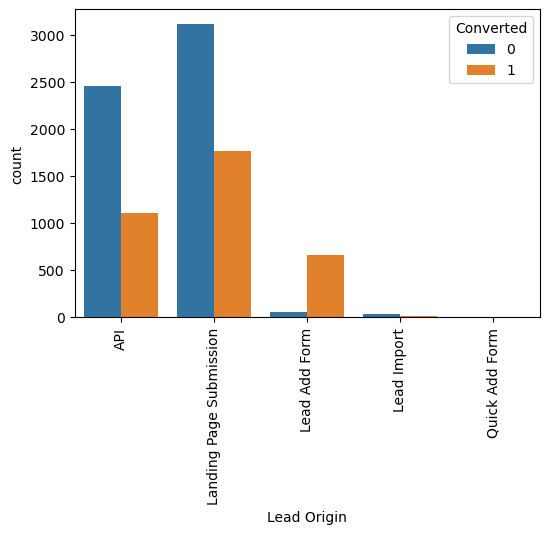

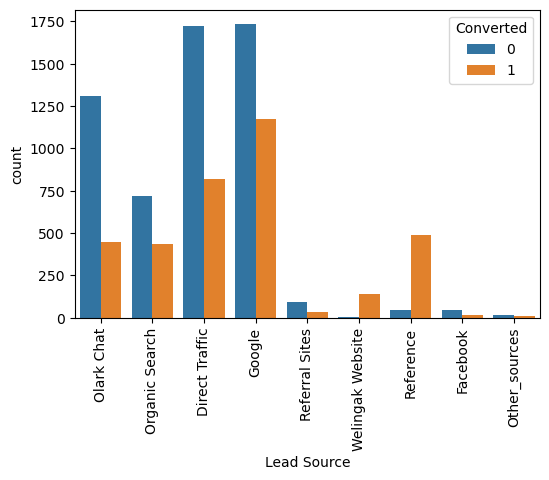

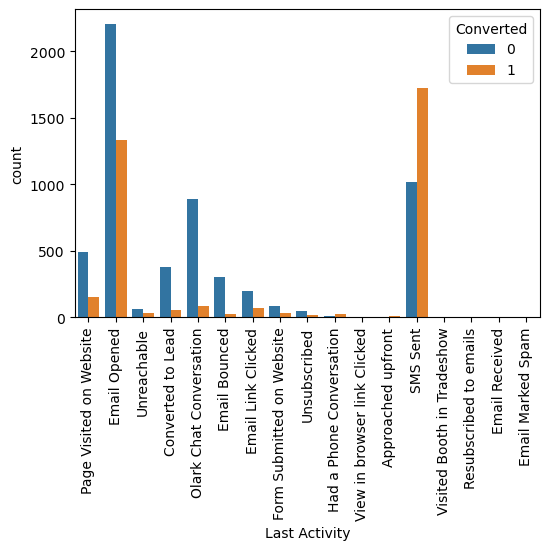

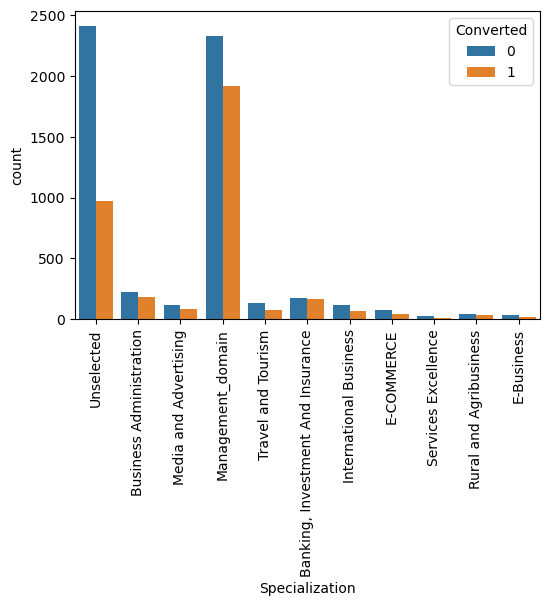

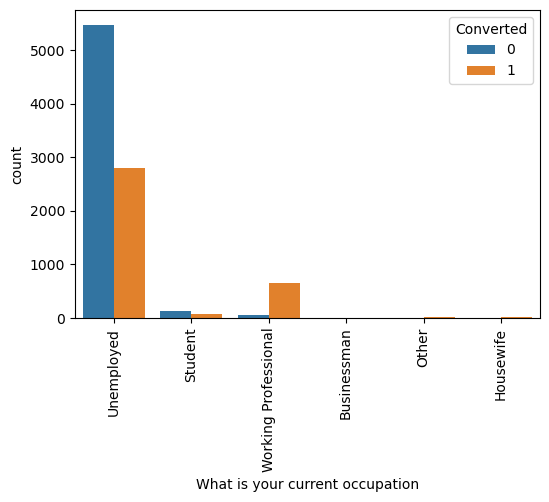

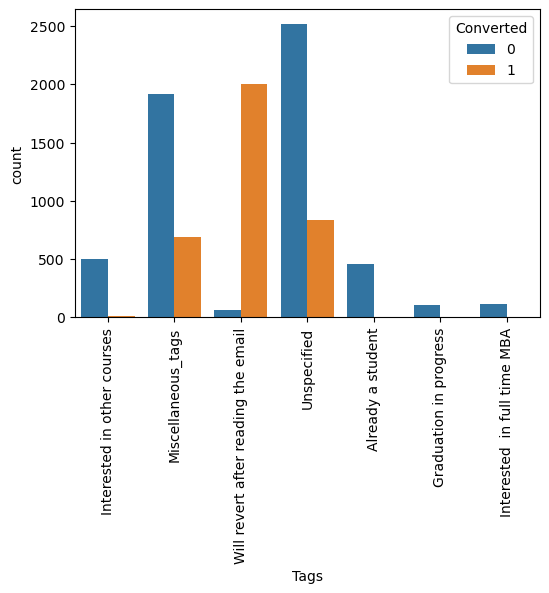

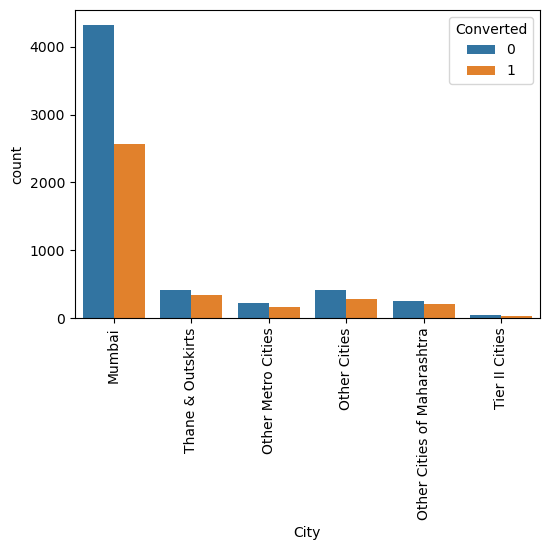

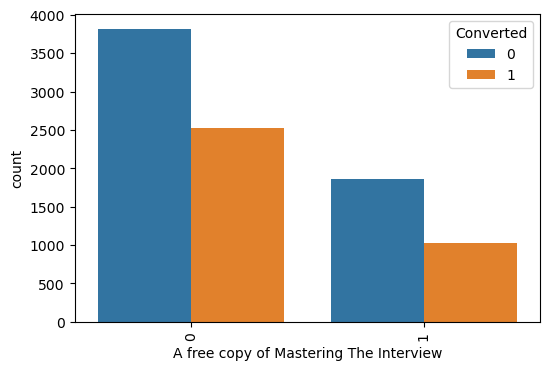

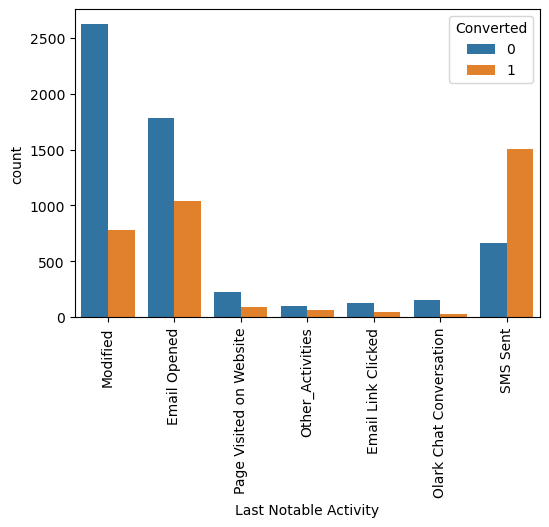

In [390]:
for cat_col in categorical_cols:
    plt.figure(figsize=[6,4])
    sns.countplot(data=Data_set1,x=cat_col,hue='Converted')
    plt.xticks(rotation=90)
    
plt.show()

-- The leads from Management Specialization had converted more and took up a course from us.

-- In terms of Occupation status, focus has to be kept on "Unemployed" and "Working Profs" as the conversion is more among them.

-- More concentration can be kept on leads in Mumbai, because the past data suggests that their conversion is more. 

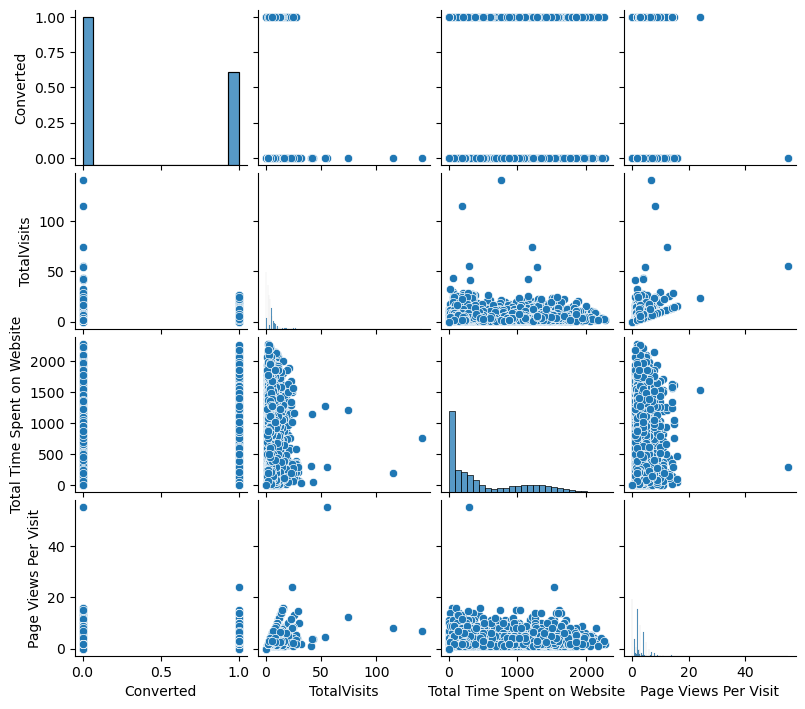

In [327]:
p_plot=sns.pairplot(Data_set1)
p_plot.fig.set_size_inches(8,7)
plt.show()

### Check for Outliers

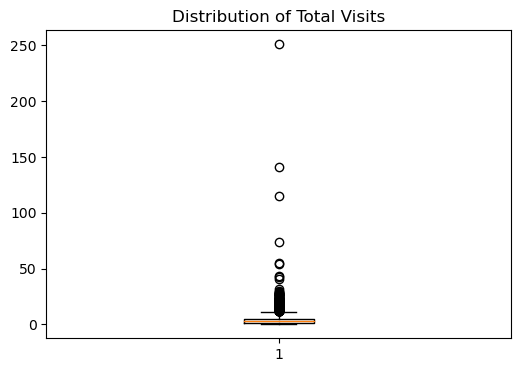

In [311]:
plt.figure(figsize=[6,4])

plt.boxplot(x='TotalVisits',data=Data_set1)
plt.title('Distribution of Total Visits')
plt.show()

In [317]:
Data_set1[Data_set1['TotalVisits']==251]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
6102,Landing Page Submission,Direct Traffic,1,251.0,49,1.48,Page Visited on Website,Management_domain,Unemployed,Interested in other courses,Mumbai,Yes,Page Visited on Website


-- As we see, the TotalVisits value of 251 is clearly an outlier. Hence, we remove the data row.

In [318]:
Data_set1=Data_set1[~(Data_set1['TotalVisits']==251)]

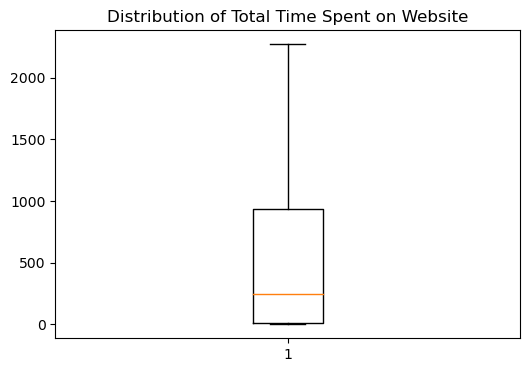

In [320]:
plt.figure(figsize=[6,4])

plt.boxplot(x='Total Time Spent on Website',data=Data_set1)
plt.title('Distribution of Total Time Spent on Website')
plt.show()

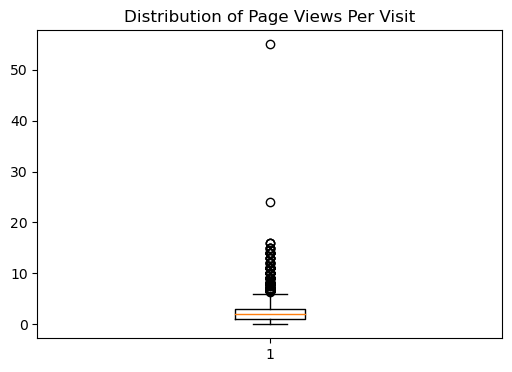

In [322]:
plt.figure(figsize=[6,4])

plt.boxplot(x='Page Views Per Visit',data=Data_set1)
plt.title('Distribution of Page Views Per Visit')
plt.show()

In [324]:
Data_set1[Data_set1['Page Views Per Visit']==55]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2190,Landing Page Submission,Direct Traffic,0,55.0,297,55.0,Page Visited on Website,Management_domain,Unemployed,Unspecified,Other Cities,Yes,Modified


In [328]:
categorical_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Creation of Dummies 

In [330]:
d1=pd.get_dummies(Data_set1['Lead Origin'],prefix='Lead_origin',drop_first=True)

In [402]:
d2=pd.get_dummies(Data_set1['Lead Source'],prefix='Lead_source',drop_first=True)

In [406]:
d3=pd.get_dummies(Data_set1['Last Activity'],prefix='Last Activity',drop_first=True)

In [336]:
d4=pd.get_dummies(Data_set1['Specialization'],prefix='Specialization',drop_first=True)

In [338]:
d5=pd.get_dummies(Data_set1['What is your current occupation'],prefix='current occupation',drop_first=True)

In [340]:
d6=pd.get_dummies(Data_set1['Tags'],prefix='Tags',drop_first=True)

In [354]:
d7=pd.get_dummies(Data_set1['City'],prefix='City')

In [397]:
d8=pd.get_dummies(Data_set1['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)

In [356]:
# Concatenate the tables and drop the existing rows

In [372]:
Data_set1=pd.concat([Data_set1,d1],axis=1)

Data_set1=pd.concat([Data_set1,d2],axis=1)

Data_set1=pd.concat([Data_set1,d3],axis=1)

In [420]:
Data_set1=pd.concat([Data_set1,d4],axis=1)

Data_set1=pd.concat([Data_set1,d5],axis=1)

Data_set1=pd.concat([Data_set1,d6],axis=1)

Data_set1=pd.concat([Data_set1,d7],axis=1)

Data_set1=pd.concat([Data_set1,d8],axis=1)

In [422]:
# Dropping the existing original columns

Data_set1.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity'],axis=1,inplace=True)

In [426]:
Data_set1.shape

(9239, 58)

<AxesSubplot:>

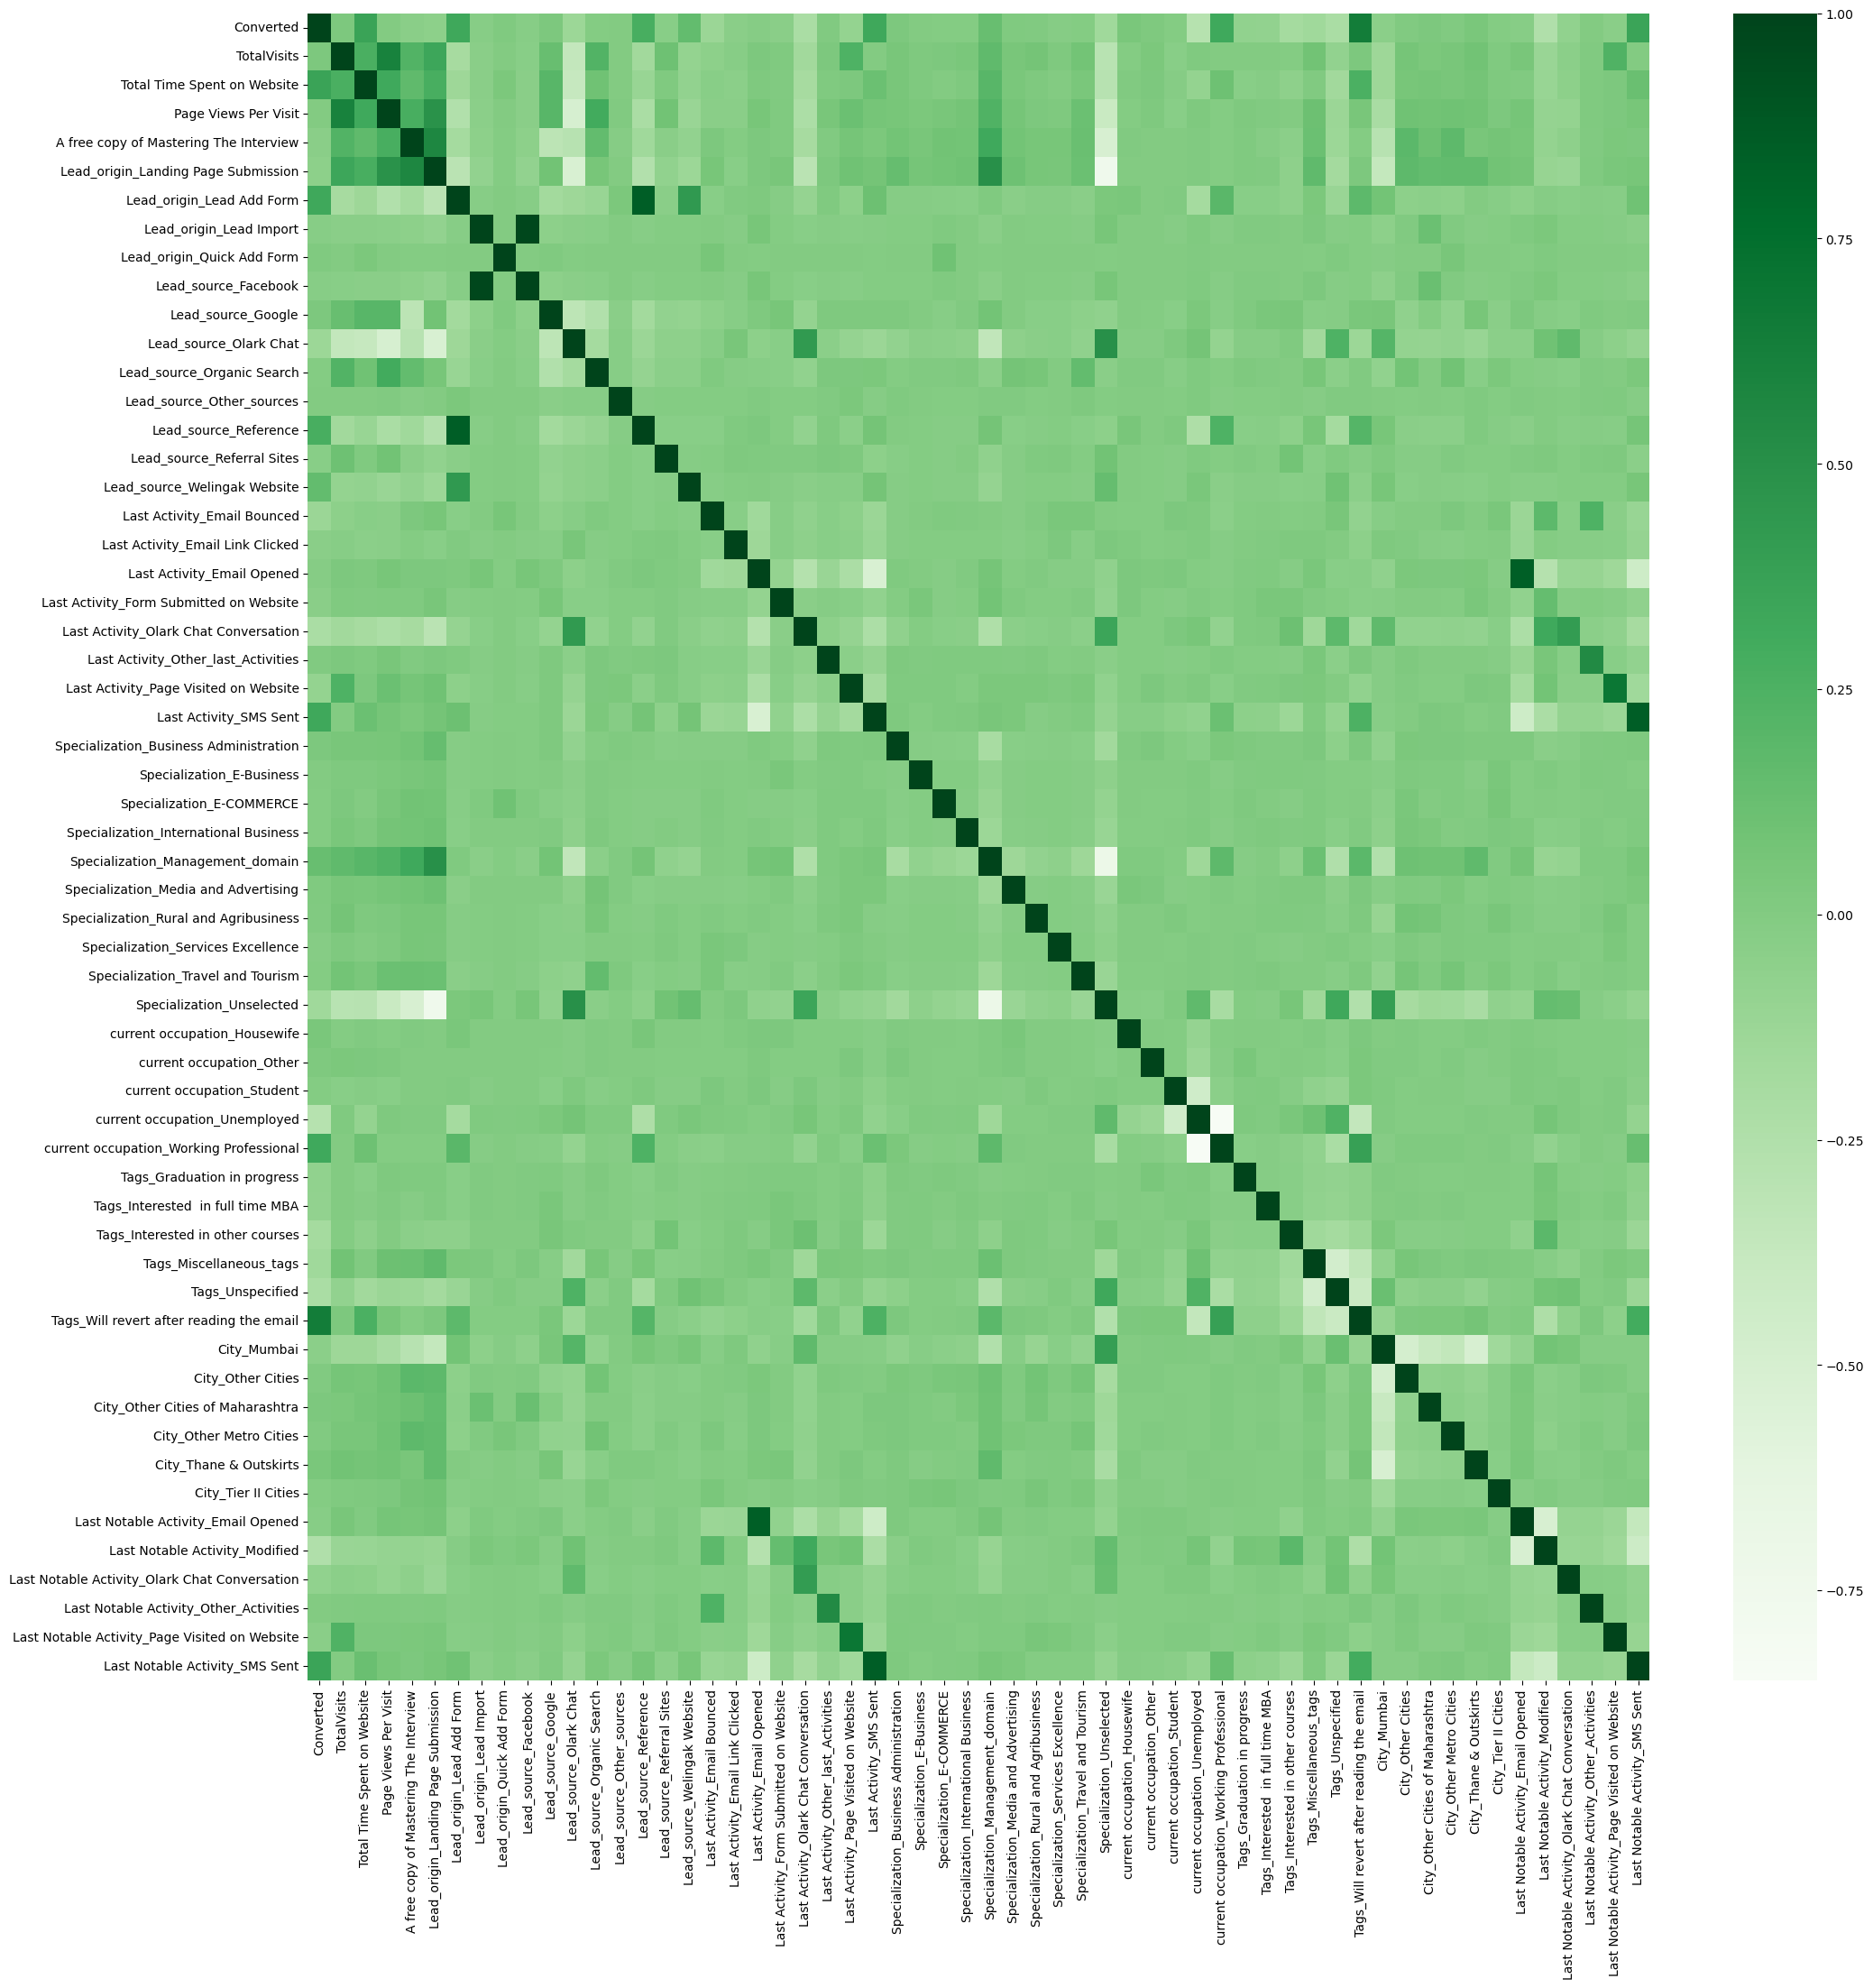

In [640]:
plt.figure(figsize=[24,24])
sns.heatmap(Data_set1.corr(),cmap='Greens')

## Train-Test Data Split

In [644]:
df_train,df_test=train_test_split(Data_set1,train_size=0.7,random_state=100)

In [645]:
print(df_train.shape)
print(df_test.shape)

(6467, 58)
(2772, 58)


#### Scaling of Data 

In [646]:
scaler=MinMaxScaler()

In [647]:
df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(df_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [648]:
X_train=df_train.drop(['Converted'],axis=1)
y_train=df_train['Converted']

X_test=df_test.drop(['Converted'],axis=1)
y_test=df_test['Converted']

In [649]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_origin_Quick Add Form,Lead_source_Facebook,Lead_source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5420,0.014184,0.199384,0.036364,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6335,0.070922,0.719190,0.090909,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6809,0.042553,0.060299,0.109091,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7595,0.014184,0.479754,0.018182,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7917,0.014184,0.583627,0.036364,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [650]:
y_train.head()

5420    0
6335    0
6809    0
7595    1
7917    0
Name: Converted, dtype: int64

## Model Building 

In [651]:
lr1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())
lr1=lr1.fit()

In [652]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Mar 2023   Deviance:                       84735.
Time:                        23:25:53   Pearson chi2:                 4.14e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                         -3.885e+15   2.62e+07  -1.49e+08      0.000   -3.88e+15   -3.88e+15
TotalVisits                                    3.433e+15   3.52e+07   9.75e+07      0.000    3.43e+15    3.43e+15
Total Time Spent on Website                    2.184e+15   4.03e+06   5.43e+08      0.000    2.18e+15    2.18e+15
Page Views Per Visit                          -3.812e+15   3.12e+07  -1.22e+08      0.000   -3.81e+15   -3.81e+15
A free copy of Mastering The Interview         1.235e+14   2.68e+06    4.6e+07      0.000    1.24e+14    1.24e+14
Lead_origin_Landing Page Submission           -3.956e+14   3.35e+06  -1.18e+08      0.000   -3.96e+14   -3.96e+14
Lead_origin_Lead Add Form                      1.043e+15   1.28e+07   8.12e+07      0.000    1.04e+15    1.04e+15
Lead_origin_Lead Import                        2.538e+14    4.8e+07   5.28e+06      0.000    2.54e+14    2.54e+14
Lead_origin_Quick Add Form                     3.584e+15    6.8e+07   5.27e+07      0.000    3.58e+15    3.58e+15
Lead_source_Facebook                          -5.531e+14   4.81e+07  -1.15e+07      0.000   -5.53e+14   -5.53e+14
Lead_source_Google                             1.368e+14    2.8e+06   4.88e+07      0.000    1.37e+14    1.37e+14
Lead_source_Olark Chat                         1.761e+14    3.9e+06   4.52e+07      0.000    1.76e+14    1.76e+14
Lead_source_Organic Search                     4.754e+13   3.18e+06   1.49e+07      0.000    4.75e+13    4.75e+13
Lead_source_Other_sources                     -1.777e+14   1.69e+07  -1.05e+07      0.000   -1.78e+14   -1.78e+14
Lead_source_Reference                          3.709e+13   1.34e+07   2.76e+06      0.000    3.71e+13    3.71e+13
Lead_source_Referral Sites                    -2.394e+14   7.57e+06  -3.16e+07      0.000   -2.39e+14   -2.39e+14
Lead_source_Welingak Website                   2.402e+14   1.47e+07   1.64e+07      0.000     2.4e+14     2.4e+14
Last Activity_Email Bounced                    -2.22e+14   6.08e+06  -3.65e+07      0.000   -2.22e+14   -2.22e+14
Last Activity_Email Link Clicked               8.514e+13   9.22e+06   9.23e+06      0.000    8.51e+13    8.51e+13
Last Activity_Email Opened                     5.193e+14   5.16e+06   1.01e+08      0.000    5.19e+14    5.19e+14
Last Activity_Form Submitted on Website         9.02e+13    8.5e+06   1.06e+07      0.000    9.02e+13    9.02e+13
Last Activity_Olark Chat Conversation          3.601e+14   5.21e+06   6.91e+07      0.000     3.6e+14     3.6e+14
Last Activity_Other_last_Activities            2.146e+14   8.26e+06    2.6e+07      0.000    2.15e+14    2.15e+14
Last Activity_Page Visited on Website           2.01e+13   6.05e+06   3.32e+06      0.000    2.01e+13    2.01e+13
Last 

#### Feature selection usinf RFE

In [653]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [654]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [655]:
rfe_col=X_train.columns[rfe.support_]

rfe_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead_origin_Lead Add Form', 'Lead_source_Olark Chat',
       'Lead_source_Reference', 'Lead_source_Welingak Website',
       'Last Activity_Email Bounced', 'current occupation_Housewife',
       'current occupation_Working Professional',
       'Tags_Graduation in progress', 'Tags_Miscellaneous_tags',
       'Tags_Unspecified', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

-- Asessing the model using statsmodels

In [656]:
X_train_sm = sm.add_constant(X_train[rfe_col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1934.2
Date:                Mon, 20 Mar 2023   Deviance:                       3868.4
Time:                        23:26:14   Pearson chi2:                 8.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5197
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5033      0.317    -17.374      0.000      -6.124      -4.882
TotalVisits                                  3.9214      1.392      2.818      0.005       1.194       6.649
Total Time Spent on Website                  4.3254      0.193     22.443      0.000       3.948       4.703
Page Views Per Visit                        -4.8781      1.514     -3.221      0.001      -7.846      -1.910
Lead_origin_Lead Add Form                    2.0859      0.668      3.125      0.002       0.778       3.394
Lead_source_Olark Chat                       0.8230      0.137      6.012      0.000       0.555       1.091
Lead_source_Reference                        1.3861      0.702      1.976      0.048       0.011       2.761
Lead_source_Welingak Website                 3.8614      0.980      3.939      0.000       1.940       5.783
Last Activity_Email Bounced                 -1.6114      0.349     -4.621      0.000      -2.295      -0.928
current occupation_Housewife                22.0599   1.47e+04      0.001      0.999   -2.88e+04    2.89e+04
current occupation_Working Professional      2.2681      0.273      8.315      0.000       1.733       2.803
Tags_Graduation in progress                  1.8981      0.580      3.272      0.001       0.761       3.035
Tags_Miscellaneous_tags                      2.5287      0.303      8.347      0.000       1.935       3.122
Tags_Unspecified                             2.9247      0.302      9.669      0.000       2.332       3.518
Tags_Will revert after reading the email     6.9627      0.339     20.546      0.000       6.299       7.627
Last Notable Activity_SMS Sent               1.3296      0.095     13.946      0.000       1.143       1.516
============================================================================================================
"""

In [657]:
# We see that the column 'current occupation_Housewife' has a high p-value. Hence, it must be dropped.

rfe_col=rfe_col.drop('current occupation_Housewife')

In [658]:
X_train_sm = sm.add_constant(X_train[rfe_col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1936.6
Date:                Mon, 20 Mar 2023   Deviance:                       3873.3
Time:                        23:26:32   Pearson chi2:                 8.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5193
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5024      0.317    -17.371      0.000      -6.123      -4.882
TotalVisits                                  3.8957      1.389      2.804      0.005       1.173       6.618
Total Time Spent on Website                  4.3242      0.193     22.446      0.000       3.947       4.702
Page Views Per Visit                        -4.8639      1.513     -3.214      0.001      -7.830      -1.898
Lead_origin_Lead Add Form                    2.0843      0.667      3.123      0.002       0.776       3.392
Lead_source_Olark Chat                       0.8213      0.137      6.002      0.000       0.553       1.089
Lead_source_Reference                        1.4002      0.701      1.997      0.046       0.026       2.775
Lead_source_Welingak Website                 3.8606      0.980      3.938      0.000       1.939       5.782
Last Activity_Email Bounced                 -1.6142      0.349     -4.628      0.000      -2.298      -0.930
current occupation_Working Professional      2.2622      0.273      8.290      0.000       1.727       2.797
Tags_Graduation in progress                  1.8983      0.580      3.273      0.001       0.761       3.035
Tags_Miscellaneous_tags                      2.5343      0.303      8.365      0.000       1.940       3.128
Tags_Unspecified                             2.9257      0.303      9.671      0.000       2.333       3.519
Tags_Will revert after reading the email     6.9655      0.339     20.555      0.000       6.301       7.630
Last Notable Activity_SMS Sent               1.3257      0.095     13.914      0.000       1.139       1.512
============================================================================================================
"""

In [659]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead_origin_Lead Add Form,17.60
5,Lead_source_Reference,14.17
6,Lead_source_Welingak Website,4.21
2,Page Views Per Visit,3.69
12,Tags_Will revert after reading the email,2.66
0,TotalVisits,2.51
11,Tags_Unspecified,2.39
1,Total Time Spent on Website,2.25
10,Tags_Miscellaneous_tags,2.12
4,Lead_source_Olark Chat,1.65


-- The column Lead_origin_Lead Add Form has high VIF value and it has to be dropped.

In [660]:
rfe_col=rfe_col.drop('Lead_origin_Lead Add Form')

In [661]:
X_train_sm = sm.add_constant(X_train[rfe_col])
lr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = lr3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6467
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.5
Date:                Mon, 20 Mar 2023   Deviance:                       3883.1
Time:                        23:29:50   Pearson chi2:                 8.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5186
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4743      0.316    -17.325      0.000      -6.094      -4.855
TotalVisits                                  3.8524      1.383      2.786      0.005       1.143       6.562
Total Time Spent on Website                  4.3034      0.192     22.404      0.000       3.927       4.680
Page Views Per Visit                        -5.1503      1.515     -3.399      0.001      -8.120      -2.181
Lead_source_Olark Chat                       0.7956      0.136      5.845      0.000       0.529       1.062
Lead_source_Reference                        3.4576      0.243     14.222      0.000       2.981       3.934
Lead_source_Welingak Website                 5.9103      0.729      8.105      0.000       4.481       7.340
Last Activity_Email Bounced                 -1.5313      0.341     -4.485      0.000      -2.201      -0.862
current occupation_Working Professional      2.2518      0.273      8.262      0.000       1.718       2.786
Tags_Graduation in progress                  1.8956      0.579      3.272      0.001       0.760       3.031
Tags_Miscellaneous_tags                      2.5355      0.303      8.382      0.000       1.943       3.128
Tags_Unspecified                             2.9283      0.302      9.694      0.000       2.336       3.520
Tags_Will revert after reading the email     6.9942      0.338     20.663      0.000       6.331       7.658
Last Notable Activity_SMS Sent               1.3294      0.095     13.972      0.000       1.143       1.516
============================================================================================================
"""

In [662]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.68
11,Tags_Will revert after reading the email,2.62
0,TotalVisits,2.51
10,Tags_Unspecified,2.38
1,Total Time Spent on Website,2.25
9,Tags_Miscellaneous_tags,2.11
3,Lead_source_Olark Chat,1.65
12,Last Notable Activity_SMS Sent,1.51
7,current occupation_Working Professional,1.33
4,Lead_source_Reference,1.32


In [663]:
# The P-value as well as VIF of attributes are in the acceptable range. Hence, we continuee building the model.

In [664]:
# Predicting the conversion using X_train data

y_train_pred = res1.predict(X_train_sm)

In [665]:
y_train_pred=y_train_pred.values.reshape(-1)

In [666]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_score':y_train_pred*100})

y_train_pred_final.head()

,Converted,Lead_score
0,0,2.309471
1,0,7.080484
2,0,0.363769
3,1,37.273472
4,0,36.356499


In [667]:
y_train_pred_final['Lead_converted']=y_train_pred_final['Lead_score'].map(lambda x: 1 if x>50 else 0)

In [668]:
y_train_pred_final.head()

,Converted,Lead_score,Lead_converted
0,0,2.309471,0
1,0,7.080484,0
2,0,0.363769,0
3,1,37.273472,0
4,0,36.356499,0


#### Creating Confusion Matrix 

In [669]:
from sklearn import metrics

confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Lead_converted'])

In [670]:
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Lead_converted'])

0.8727385186330602

In [671]:
confusion

array([[3750,  237],
       [ 586, 1894]], dtype=int64)

In [672]:
TP=confusion[1,1]   #True Positives
TN=confusion[0,0]   #True Negatives
FP=confusion[0,1]   #False Positives
FN=confusion[1,0]   #False Negatives

TPR=TP/(TP+FN)

FPR=FP/(FP+TN)

#### ROC Curve

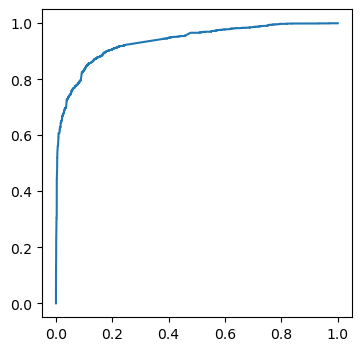

In [673]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    
    plt.figure(figsize=[4,4])
    plt.plot(fpr,tpr)
    
    return None


draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Lead_score'])

#### Finding Optimal Threshold

In [674]:
numbers = [x*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_score,Lead_converted,0,10,20,30,40,50,60,70,80,90
0,0,2.309471,0,1,0,0,0,0,0,0,0,0,0
1,0,7.080484,0,1,0,0,0,0,0,0,0,0,0
2,0,0.363769,0,1,0,0,0,0,0,0,0,0,0
3,1,37.273472,0,1,1,1,1,0,0,0,0,0,0
4,0,36.356499,0,1,1,1,1,0,0,0,0,0,0


In [675]:
cutoff_df=pd.DataFrame(columns=['Lead_score','accuracy','sensi','speci'])
num=[10,20,30,40,50,60,70,80,90]

for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    sensi=cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
    
print(cutoff_df)

    Lead_score  accuracy     sensi     speci
10        10.0  0.683934  0.966129  0.508402
20        20.0  0.846760  0.903226  0.811638
30        30.0  0.868254  0.862097  0.872084
40        40.0  0.867945  0.795968  0.912716
50        50.0  0.872739  0.763710  0.940557
60        60.0  0.871656  0.729435  0.960120
70        70.0  0.859904  0.679839  0.971909
80        80.0  0.853410  0.645968  0.982443
90        90.0  0.837792  0.590726  0.991472


<Figure size 400x400 with 0 Axes>

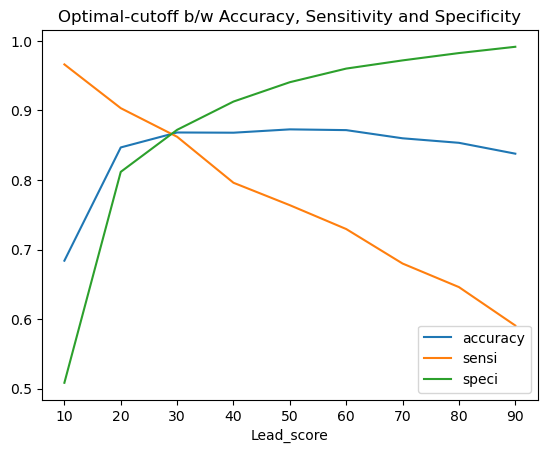

In [676]:
plt.figure(figsize=[4,4])
cutoff_df.plot.line(x='Lead_score',y=['accuracy','sensi','speci'])
plt.title('Optimal-cutoff b/w Accuracy, Sensitivity and Specificity')
plt.show()

-- From Cutoff_df Data frame as well as from the above graph, we can observe that considering "30" as the threshold value is optimal.

In [677]:
thres_value=30

In [678]:
y_train_pred_final['Final_predicted']=y_train_pred_final['Lead_score'].map(lambda x: 1 if x>thres_value else 0)

y_train_pred_final.head()

,Converted,Lead_score,Lead_converted,0,10,20,30,40,50,60,70,80,90,Final_predicted
0,0,2.309471,0,1,0,0,0,0,0,0,0,0,0,0
1,0,7.080484,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.363769,0,1,0,0,0,0,0,0,0,0,0,0
3,1,37.273472,0,1,1,1,1,0,0,0,0,0,0,1
4,0,36.356499,0,1,1,1,1,0,0,0,0,0,0,1


In [702]:
y_train_pred_final=y_train_pred_final[['Converted','Lead_score','Lead_converted','Final_predicted']]

In [704]:
y_train_pred_final.drop('Lead_converted',axis=1,inplace=True)
y_train_pred_final.head()

,Converted,Lead_score,Final_predicted
0,0,2.309471,0
1,0,7.080484,0
2,0,0.363769,0
3,1,37.273472,1
4,0,36.356499,1


In [763]:
y_train_pred_final['Lead_number']=y_train.index

y_train_pred_final.head()

,Converted,Lead_score,Final_predicted,Lead_number
0,0,2.309471,0,5420
1,0,7.080484,0,6335
2,0,0.363769,0,6809
3,1,37.273472,1,7595
4,0,36.356499,1,7917


In [679]:
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_predicted'])

0.8682542137003247

In [680]:
Train_confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Final_predicted'])
Train_confusion

array([[3477,  510],
       [ 342, 2138]], dtype=int64)

In [681]:
TP1=Train_confusion[1,1]
TN1=Train_confusion[0,0]
FP1=Train_confusion[0,1]
FN1=Train_confusion[1,0]

Train_sensi= TP1/(TP1+FN1)

Train_speci= TN1/(TN1+FP1)

###  Precision and Recall

#### Precision
TP / TP + FP

In [694]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8887846081651807

##### Recall
TP / TP + FN 

In [695]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7637096774193548

### Precision and Recall Trade-off 

In [696]:
from sklearn.metrics import precision_recall_curve

In [698]:
y_train_pred_final.Converted, y_train_pred_final.Final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6462    1
 6463    1
 6464    0
 6465    1
 6466    0
 Name: Converted, Length: 6467, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6462    1
 6463    1
 6464    0
 6465    1
 6466    0
 Name: Final_predicted, Length: 6467, dtype: int64)

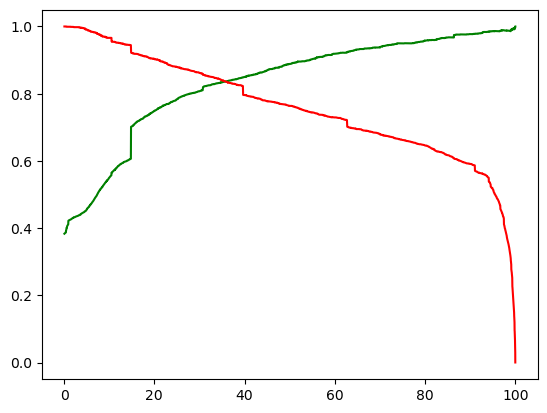

In [701]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_score)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The threshold value that is obtained from Precision-Recall trade off is also close 0.3 which we have already obtained. Hence the model metrics is going to be the same.

### Making Predictions on Test Dataset

In [682]:
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_origin_Quick Add Form,Lead_source_Facebook,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
648,0,12.0,333,6.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6076,0,1.0,1256,1.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1877,1,11.0,1039,5.5,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
658,0,12.0,1452,3.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6359,0,7.0,160,7.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [683]:
y_test=df_test['Converted']
X_test=df_test.drop(['Converted'],axis=1)

In [684]:
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [685]:
X_test=X_test[rfe_col]

In [686]:
X_test_sm=sm.add_constant(X_test)

y_test_pred=res1.predict(X_test_sm)

In [687]:
Final_df= pd.DataFrame({'Converted':y_test.values,'Lead_score':y_test_pred*100})
Final_df.head()

,Converted,Lead_score
648,0,10.439566
6076,0,0.907590
1877,1,23.408752
658,0,56.244558
6359,0,14.546947


In [688]:
Final_df['Lead_Converted']=Final_df['Lead_score'].map(lambda x: 1 if x>thres_value else 0)

Final_df.head()

,Converted,Lead_score,Lead_Converted
648,0,10.439566,0
6076,0,0.907590,0
1877,1,23.408752,0
658,0,56.244558,1
6359,0,14.546947,0


In [689]:
metrics.accuracy_score(Final_df['Converted'],Final_df['Lead_Converted'])

0.8802308802308803

In [690]:
Test_confusion=metrics.confusion_matrix(Final_df['Converted'],Final_df['Lead_Converted'])
Test_confusion

array([[1509,  183],
       [ 149,  931]], dtype=int64)

In [691]:
TP2=Test_confusion[1,1]
TN2=Test_confusion[0,0]
FP2=Test_confusion[0,1]
FN2=Test_confusion[1,0]

Test_sensi=TP2/(TP2+FN2)

Test_speci=TN2/(TN2+FP2)


#### Metrics comparison between Test and Train Data

In [692]:
######-----Test Dataset Metrics--------######

print("***----Train Data Metrics-----***")

print('Train Accuracy score : ',round(metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Final_predicted']),3))

print('Train Sensitivity : ',round(Train_sensi,3))

print('Train Specificity : ',round(Train_speci,3))

***----Train Data Metrics-----***
Train Accuracy score :  0.868
Train Sensitivity :  0.862
Train Specificity :  0.872


In [693]:
######-----Test Dataset Metrics--------######

print("***----Test Data Metrics-----***")

print('Test Accuracy score : ',round(metrics.accuracy_score(Final_df['Converted'],Final_df['Lead_Converted']),3))

print('Test Sensitivity : ',round(Test_sensi,3))

print('Test Specificity : ',round(Test_spec,3))

***----Test Data Metrics-----***
Test Accuracy score :  0.88
Test Sensitivity :  0.862
Test Specificity :  0.892


--- The accuracy of model on Train data as well as Test data is almost similar and it lies according to the objective of CEO to achieve target lead conversion rate of 80%

### Feature Importance

In [775]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                 55.08
Total Time Spent on Website                 61.53
Page Views Per Visit                       -73.64
Lead_source_Olark Chat                      11.38
Lead_source_Reference                       49.44
Lead_source_Welingak Website                84.50
Last Activity_Email Bounced                -21.89
current occupation_Working Professional     32.20
Tags_Graduation in progress                 27.10
Tags_Miscellaneous_tags                     36.25
Tags_Unspecified                            41.87
Tags_Will revert after reading the email   100.00
Last Notable Activity_SMS Sent              19.01
dtype: float64

In [777]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
11,Tags_Will revert after reading the email,100.00
5,Lead_source_Welingak Website,84.50
1,Total Time Spent on Website,61.53


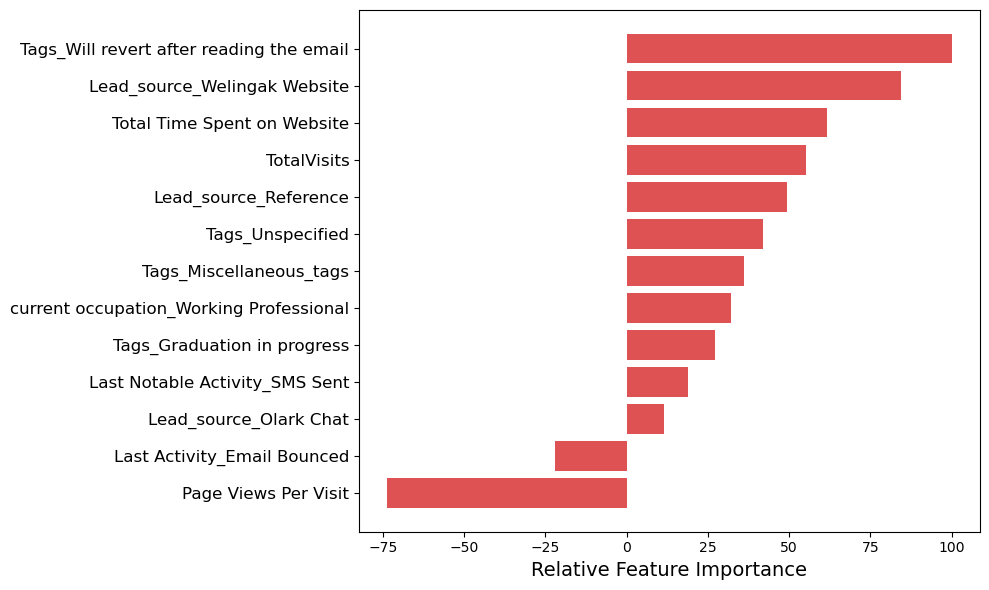

In [778]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[rfe_col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()